In [1]:
import pandas as pd
import numpy as np
# import os
# import urllib
import io
import requests

In [2]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"

In [3]:
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  108685
Number of Columns:  8


In [5]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

### Top 5 Countries

In [7]:
top_5_countries = list(df.groupby(by='Country_code').max().sort_values(by='Cumulative_cases', ascending=False).head().index)

In [8]:
df_top5 = df[df['Country_code'].isin(top_5_countries)]

In [9]:
import matplotlib.pyplot as plt

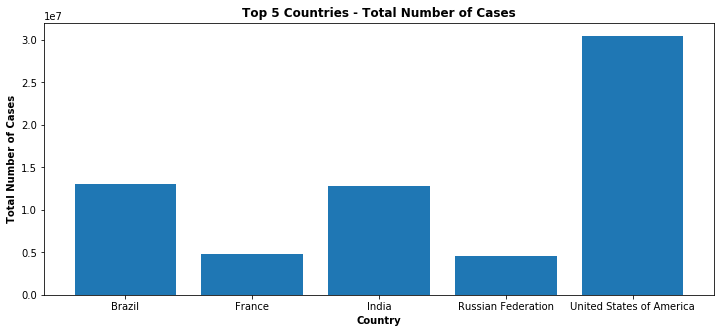

In [10]:
plt.figure(figsize=(12,5))
plt.bar(df_top5['Country'],df_top5['Cumulative_cases'])
plt.xlabel('Country',fontdict={'fontweight':'semibold'})
plt.ylabel('Total Number of Cases',fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Total Number of Cases',fontdict={'fontweight':'bold'})
plt.show()

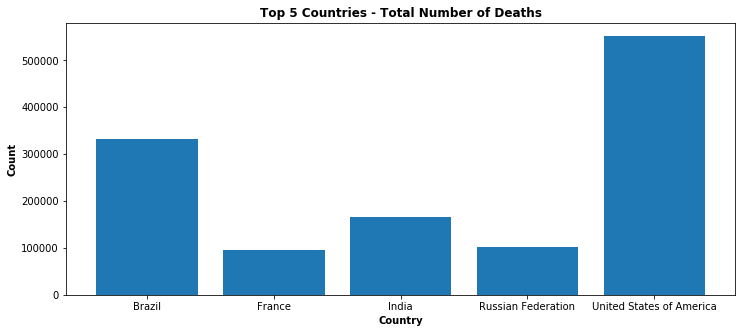

In [11]:
plt.figure(figsize=(12,5))
plt.bar(df_top5['Country'],df_top5['Cumulative_deaths'])
plt.xlabel('Country',fontdict={'fontweight':'semibold'})
plt.ylabel('Count',fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Total Number of Deaths',fontdict={'fontweight':'bold'})
plt.show()

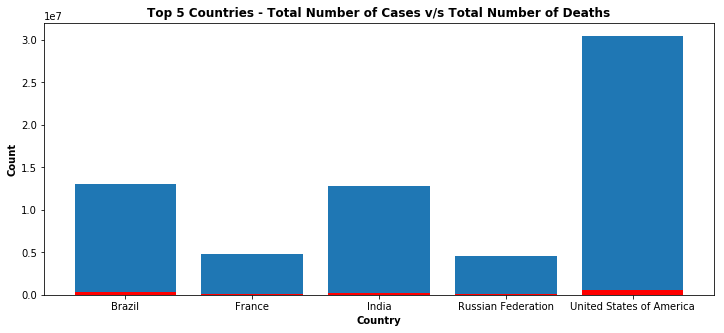

In [12]:
plt.figure(figsize=(12,5))
plt.bar(df_top5['Country'],df_top5['Cumulative_cases'])
plt.bar(df_top5['Country'],df_top5['Cumulative_deaths'],color='r')
plt.xlabel('Country',fontdict={'fontweight':'semibold'})
plt.ylabel('Count',fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Total Number of Cases v/s Total Number of Deaths',fontdict={'fontweight':'bold'})
plt.show()

In [13]:
df_fatality_rate = df_top5.groupby(by=['Country_code']).max()[['Country','Cumulative_deaths','Cumulative_cases']]

In [14]:
df_fatality_rate['Fatality_rate'] = (df_fatality_rate['Cumulative_deaths']/df_fatality_rate['Cumulative_cases'])*100
df_fatality_rate

,Country,Cumulative_deaths,Cumulative_cases,Fatality_rate
Country_code,,,,
BR,Brazil,332752,13013601,2.556956
FR,France,96260,4757381,2.023382
IN,India,166177,12801785,1.298077
RU,Russian Federation,101106,4597868,2.198976
US,United States of America,552125,30475874,1.811679


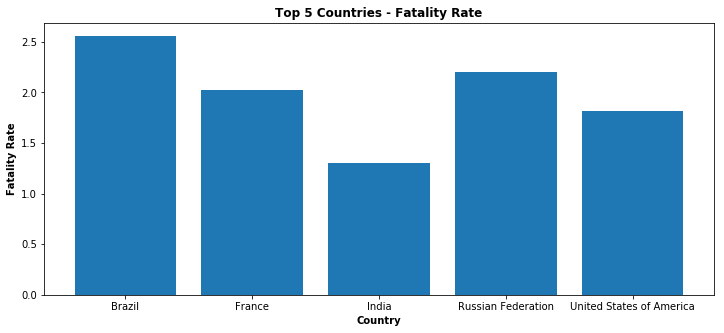

In [15]:
plt.figure(figsize=(12,5))
plt.bar(df_fatality_rate['Country'],df_fatality_rate['Fatality_rate'])
plt.xlabel('Country', fontdict={'fontweight':'semibold'})
plt.ylabel('Fatality Rate', fontdict={'fontweight':'semibold'})
plt.title('Top 5 Countries - Fatality Rate', fontdict={'fontweight':'semibold'})
plt.show()

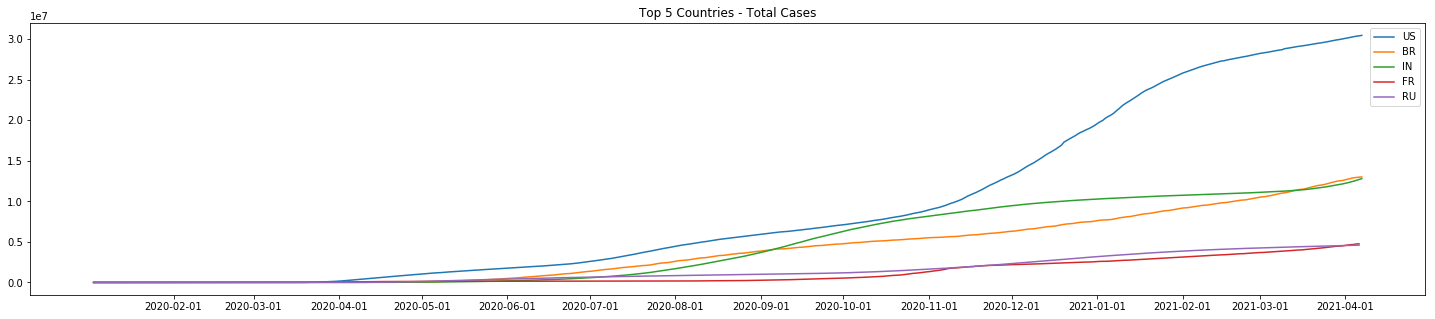

In [16]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['Cumulative_cases'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
            '2021-04-01'])

plt.title('Top 5 Countries - Total Cases')

plt.show()

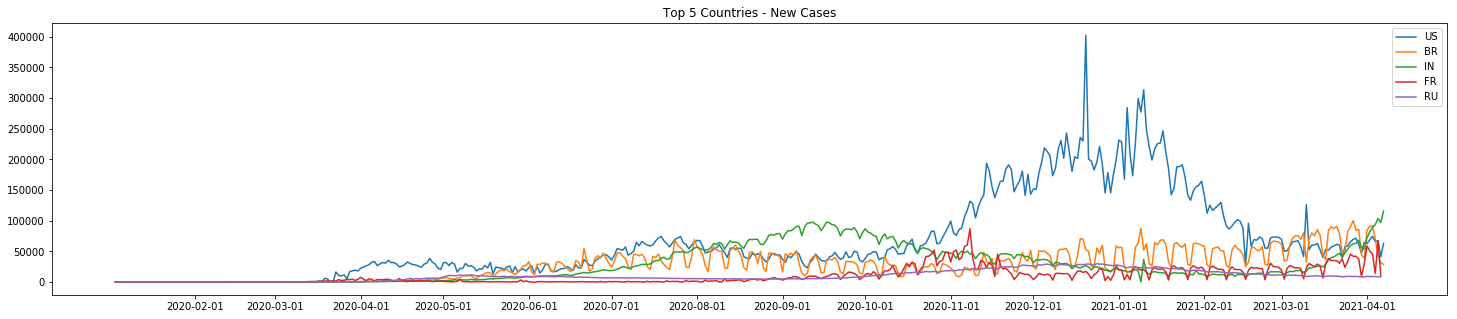

In [17]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['New_cases'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
            '2021-04-01'])

# import numpy as np
# import calendar
# plt.xticks(calendar.month_name[1:13])
plt.title('Top 5 Countries - New Cases')

plt.show()

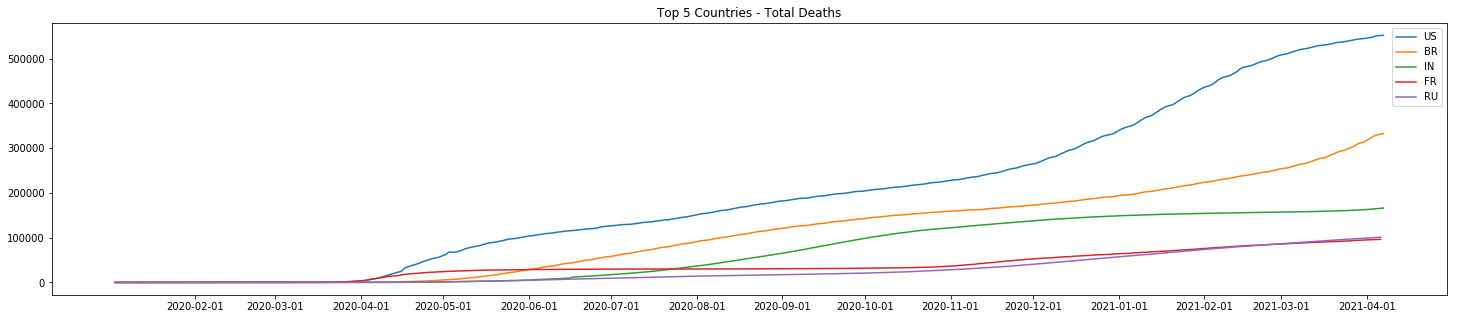

In [18]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['Cumulative_deaths'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
            '2021-04-01'])

plt.title('Top 5 Countries - Total Deaths')

plt.show()

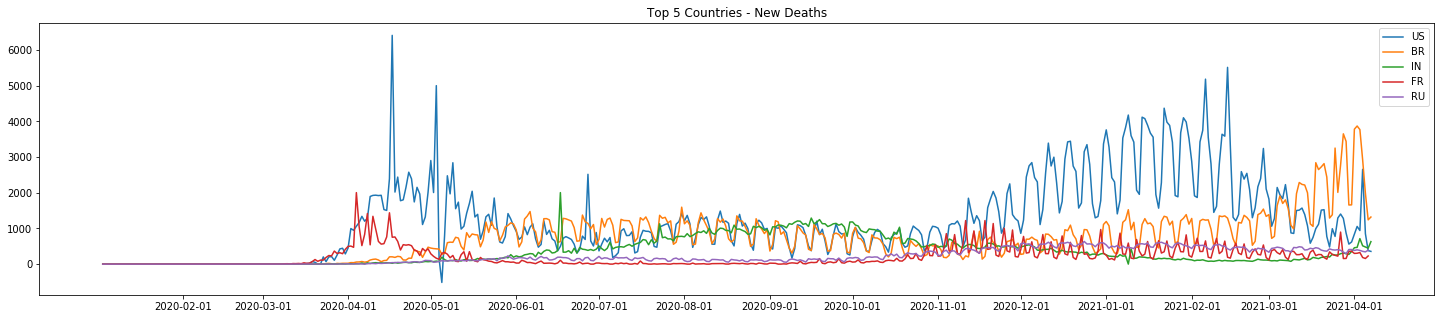

In [19]:
plt.figure(figsize=(25,5))

for i in top_5_countries:
    plt.plot(df_top5.loc[df_top5['Country_code']==i]['Date_reported'], df_top5.loc[df_top5['Country_code']==i]['New_deaths'])

plt.legend(top_5_countries)

plt.xticks(['2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01',
            '2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
            '2021-04-01'])

plt.title('Top 5 Countries - New Deaths')

plt.show()